# Test 2020-02-24

In [1]:
S = np.array([[4, -3], [-3, 4]])

In [10]:
l, V = np.linalg.eig(S)

In [11]:
l

array([7., 1.])

In [12]:
V

array([[ 0.70710678,  0.70710678],
       [-0.70710678,  0.70710678]])

## 모멘트 방법

In [1]:
df = pd.DataFrame({"produce": [7, 8, 10, 11, 12, 14], 
                   "days": [10, 10, 20, 30, 20, 10]},
                   columns=["produce", "days"])
df

,produce,days
0,7,10
1,8,10
2,10,20
3,11,30
4,12,20
5,14,10


이항분포의 $N, \mu$를 모멘트 방법으로 추정하라.

In [2]:
df["prob"] = df["days"] / df["days"].sum(axis=0)

In [3]:
mean = (df.produce * df.prob).sum() 
mean

10.6

In [4]:
np.average(df.produce, weights=df.prob)

10.600000000000001

In [5]:
var = ((df.produce - mean)**2 * df.prob).sum()
var

3.6400000000000006

In [6]:
np.average((df.produce - mean)**2, weights=df.prob)

3.640000000000001

$$ N\mu = 10.6 $$ 

$$ N\mu(1-\mu) = 3.64 $$

$$ {N\mu(1-\mu) \over  N\mu} = 1-\mu = 3.64 / 10.6 $$

$$ \mu = 0.66 $$

$$ N = 10.6 / \mu \approx 16 $$

In [7]:
df["type"] = "sample"

In [8]:
rv = sp.stats.binom(n=16, p=0.67)
df2 = pd.DataFrame({"produce": np.arange(17), "prob": rv.pmf(np.arange(17)), "type":"binomial"})
df2

,produce,prob,type
0,0,1.977985e-08,binomial
1,1,6.425455e-07,binomial
2,2,9.784216e-06,binomial
3,3,9.270297e-05,binomial
4,4,6.116992e-04,binomial
5,5,2.980643e-03,binomial
6,6,1.109462e-02,binomial
7,7,3.217919e-02,binomial
8,8,7.350019e-02,binomial
9,9,1.326468e-01,binomial


In [9]:
df3 = pd.concat([df, df2], axis=0)
df3

,days,prob,produce,type
0,10.0,1.000000e-01,7,sample
1,10.0,1.000000e-01,8,sample
2,20.0,2.000000e-01,10,sample
3,30.0,3.000000e-01,11,sample
4,20.0,2.000000e-01,12,sample
5,10.0,1.000000e-01,14,sample
0,NaN,1.977985e-08,0,binomial
1,NaN,6.425455e-07,1,binomial
2,NaN,9.784216e-06,2,binomial
3,NaN,9.270297e-05,3,binomial


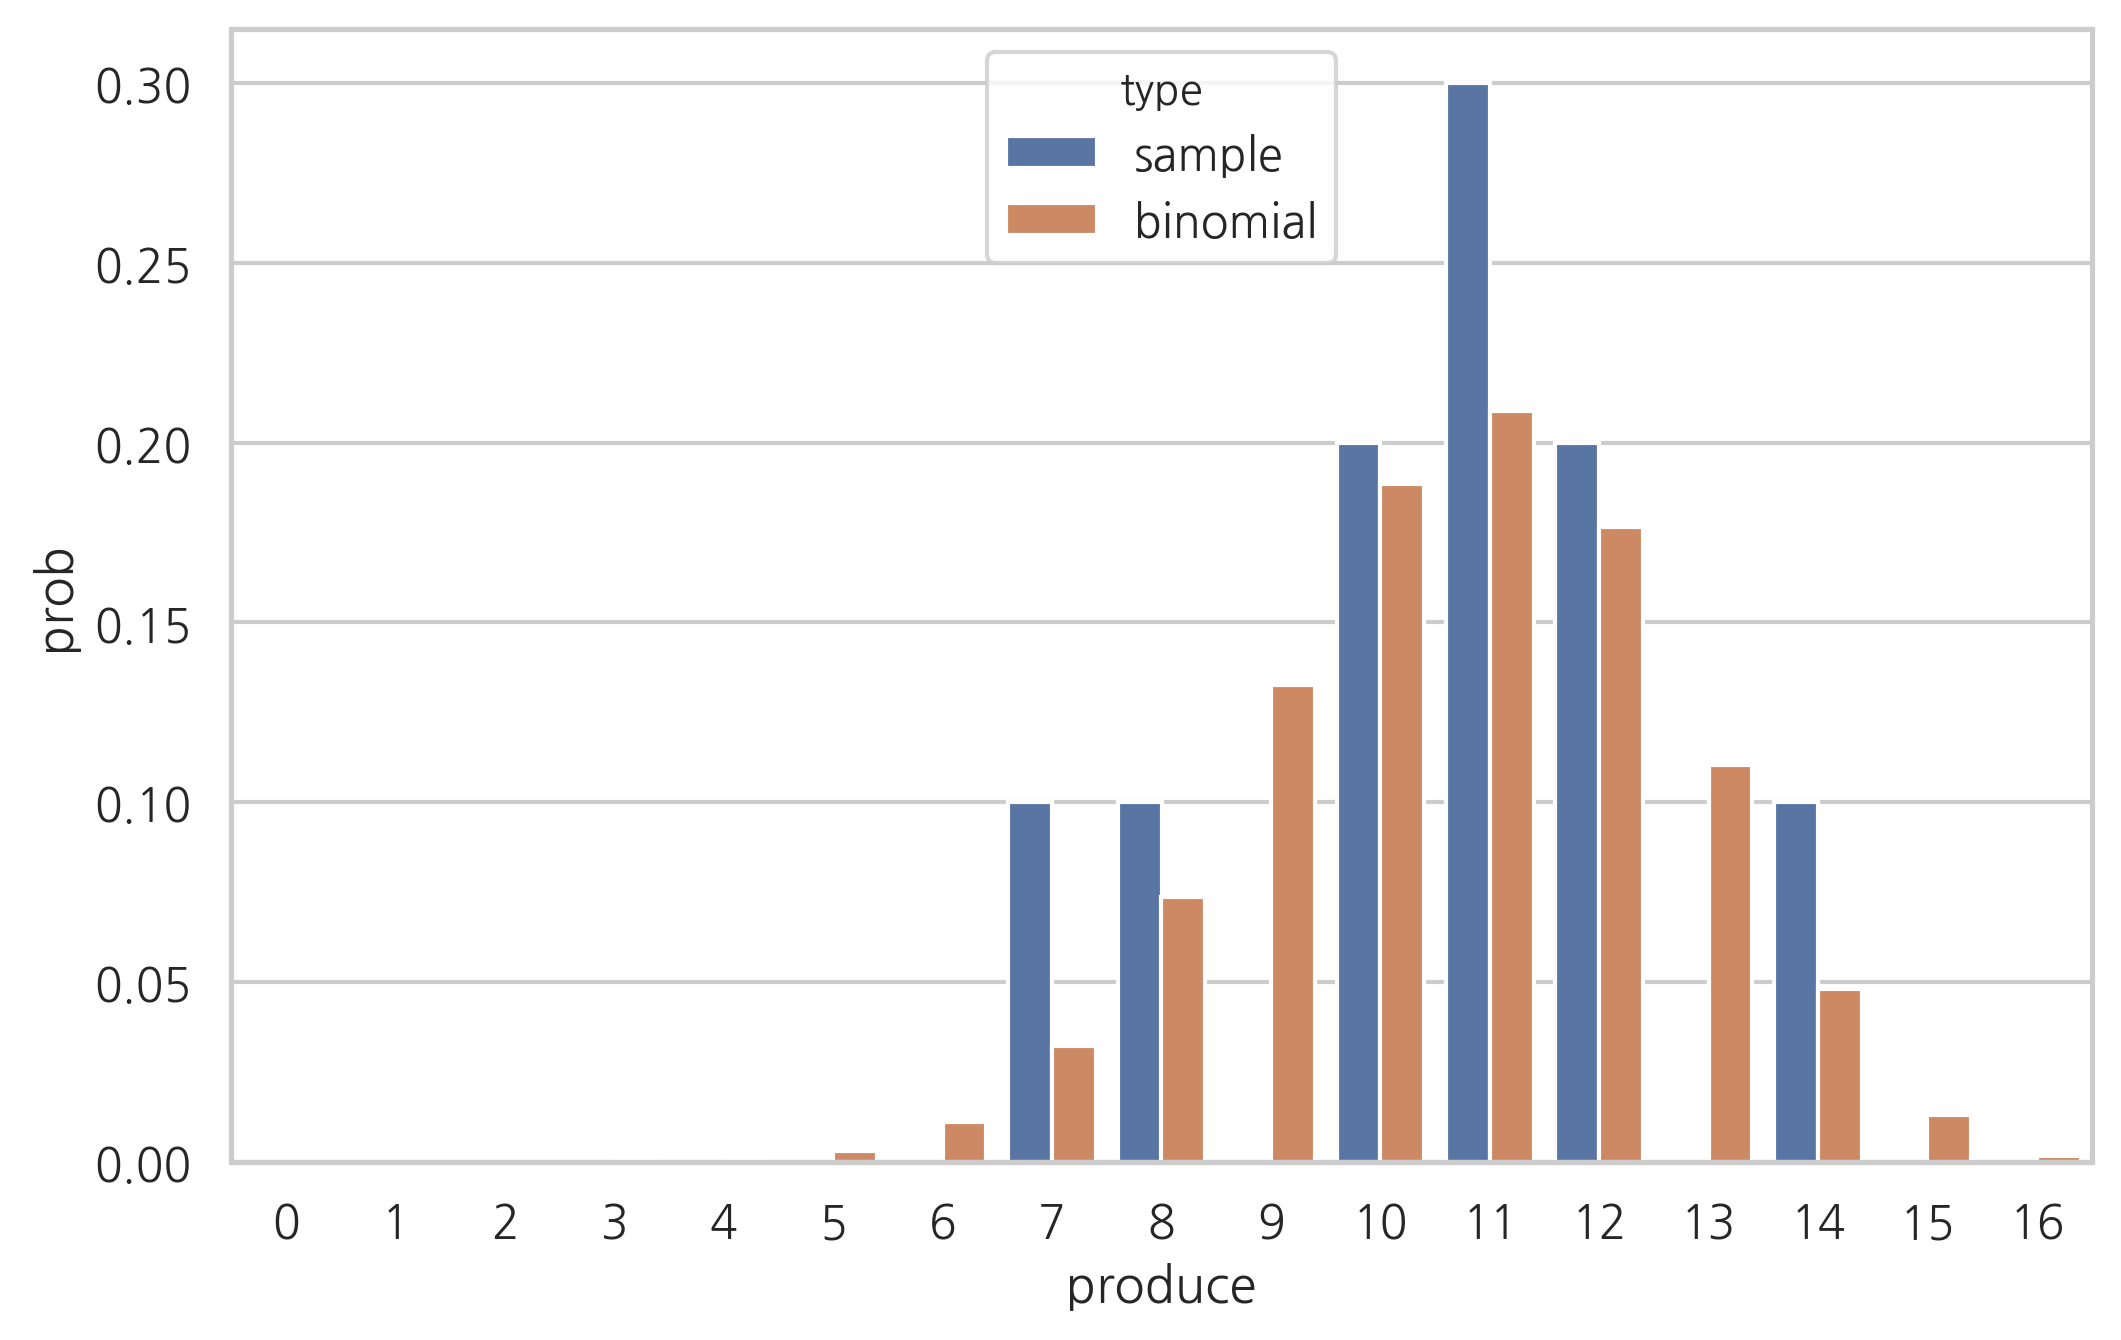

In [10]:
sns.barplot(x="produce", y="prob", hue="type", data=df3)
plt.show()

## MLE

(1) 베르누이분포의 모수 추정

$$ \{ 1, 0, 0, 0 \} $$

(2) 카테고리분포의 모수 추정

$$ \{ 1, 1, 1, 1, 2, 2, 2, 3, 3, 4 \} $$

(3) 이항분포의 모수추정: 

$$ N = 4, N_1 = 1 $$

(4) 다항분포의 모수 추정 

$$ N_1 = 4, N_2 = 3, N_3 = 2, N_4 = 1 $$

(5) 정규분포의 모수추정 

$$ \{ 1,2, 3, 4, 5 \} $$

## 베이즈 추정

(1) 동일한 상품 다른 회사

상품 A: 전체 평가의견 5개, 좋아요 3개, 싫어요 2개

상품 B: 전체 평가의견 100개, 좋아요 55개, 싫어요 45개

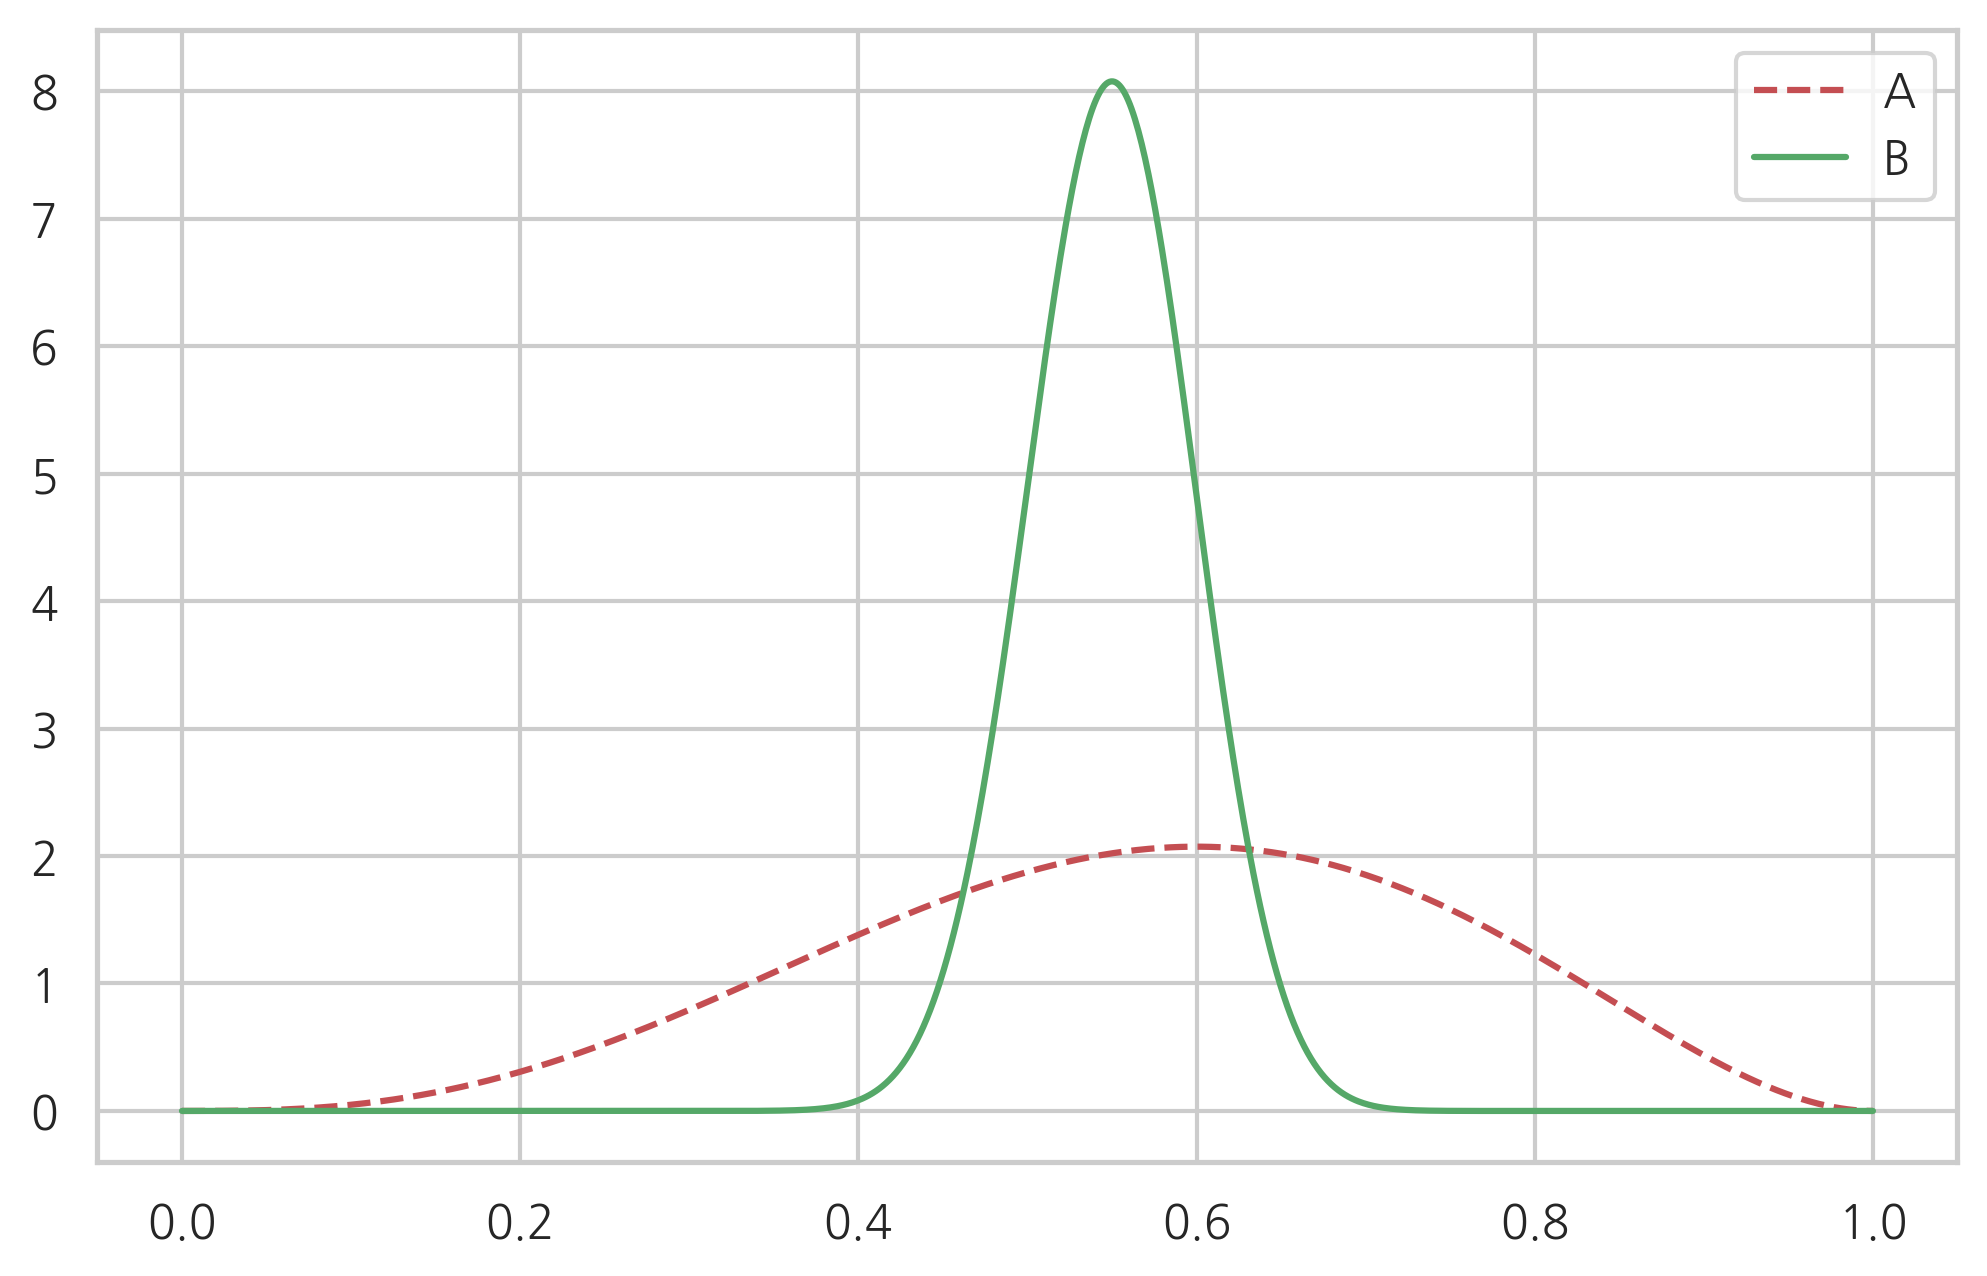

In [11]:
xx = np.linspace(0, 1, 1000)
plt.plot(xx, sp.stats.beta(1+3, 1+2).pdf(xx), c="r", ls="--", label="A")
plt.plot(xx, sp.stats.beta(1+55, 1+45).pdf(xx), c="g", ls="-", label="B")
plt.legend()
plt.show()

(2) 상품평 추가

상품 A: 평가의견 5개 추가, 좋아요 3개, 싫어요 2개

상품 B: 전체 평가의견 100개, 좋아요 55개, 싫어요 45개

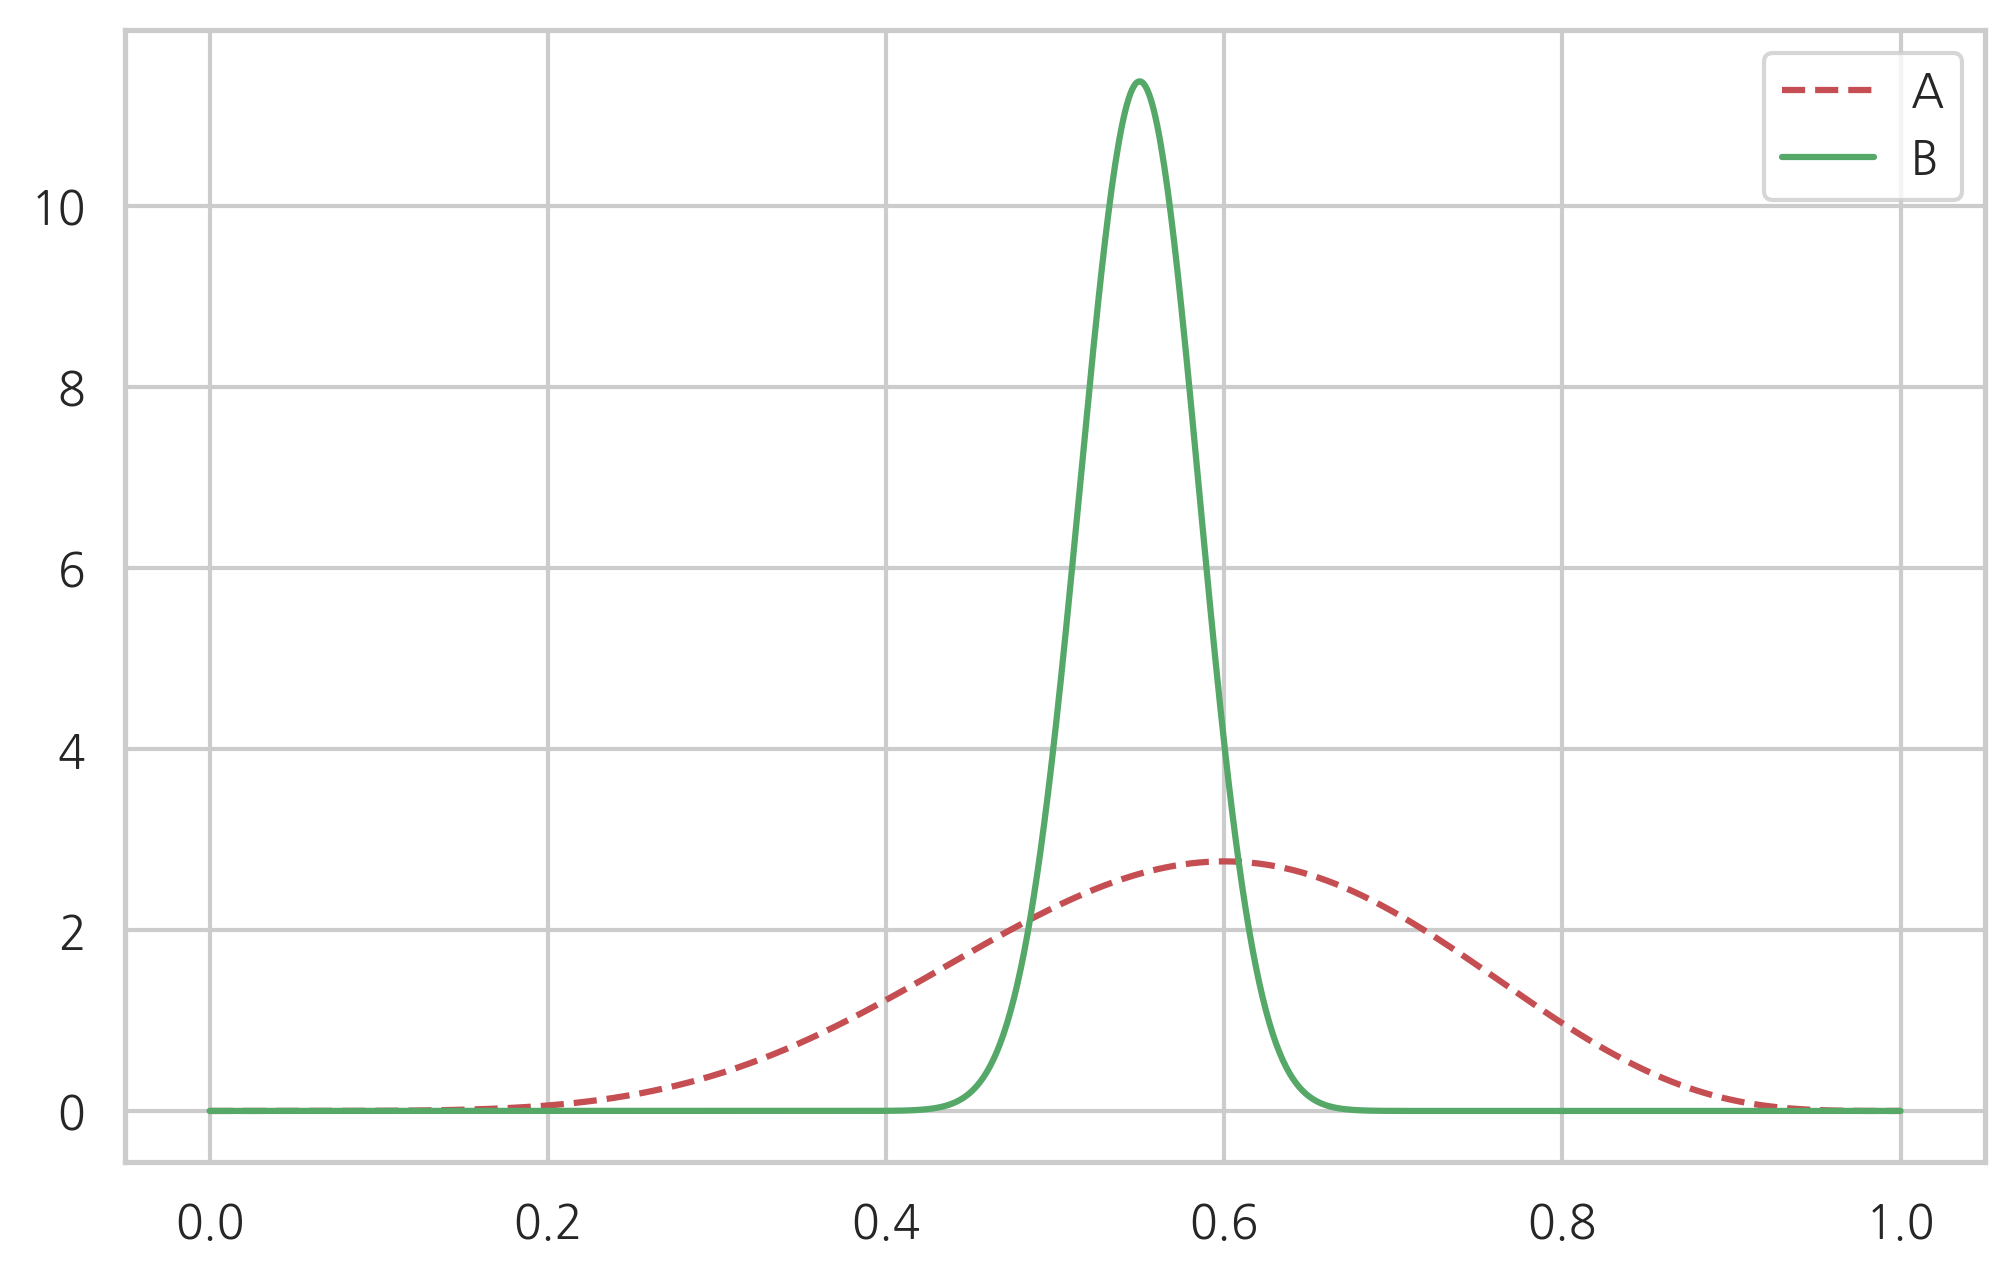

In [12]:
xx = np.linspace(0, 1, 1000)
plt.plot(xx, sp.stats.beta(1+3+3, 1+2+2).pdf(xx), c="r", ls="--", label="A")
plt.plot(xx, sp.stats.beta(1+55+55, 1+45+45).pdf(xx), c="g", ls="-", label="B")
plt.legend()
plt.show()

(3) 상품평이 품질을 정확히 반영한다는 가정(상품평이 더 좋으면 품질이 더 좋다.)하에 A의 품질이 B보다 좋을 확률은?

In [3]:
N = 1000000
a = sp.stats.beta(1+2, 1+1).rvs(N)
b = sp.stats.beta(1+65, 1+35).rvs(N)
(a > b).sum()/N

0.441095

## 검정

표본조사를 한 1000명 중 520명이 찬성하였다. 전체 인구가 찬성이 더 많다고 말할 수 있는가?

* 귀무가설은?
* 대립가설은?
* 양측/단측?
* 유의확률은?

In [14]:
rv = sp.stats.binom(1000, 0.5)
1 - rv.cdf(520 - 1)

0.10872414660212004

In [15]:
sp.stats.binom_test(520, 1000, 0.5, "greater")

0.10872414660212008

## 이항검정

(1) 1000가구 표본조사에서 40가구가 시청하고 있다. 시청율이 5%라고 할 수 있는가? (유의수준 5%)

In [16]:
rv = sp.stats.binom(1000, 0.05)
rv.pmf(40)

0.020821694204788944

In [17]:
rv.pmf(60)

0.019669659751570204

In [18]:
rv.cdf(40) + (1 - rv.cdf(60 - 1))

0.16736875164167136

In [19]:
sp.stats.binom_test(40, 1000, 0.05)

0.1673687516416663

(2) 1000가구 표본조사에서 70가구가 시청하고 있다. 시청율이 5%라고 할 수 있는가? (유의수준 5%)

In [20]:
sp.stats.binom_test(70, 1000, 0.05)

0.005670160942553233

(3) 1000가구 표본조사에서 시청율이 5%가 유의수준 5%에서 유의하려면 몇 가구가 시청해야 하는가?

In [36]:
x = np.arange(1001)
x[np.array(list(map(lambda x: sp.stats.binom_test(x, 1000, 0.05), x))) > 0.05]

array([37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53,
       54, 55, 56, 57, 58, 59, 60, 61, 62, 63])

In [22]:
np.sqrt(1000*0.05*0.95) * 1.96

13.508367777048417

In [38]:
np.sqrt(1000*0.05*0.95)

6.892024376045111

In [23]:
import seaborn as sns
tips = sns.load_dataset("tips")
tips

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


다음 주장의 유의성을 파악하라

* 목요일에는 여자가 남자보다 많다.

In [24]:
tips[tips.day == "Thur"].groupby("sex").size()

sex
Male      30
Female    32
dtype: int64

In [25]:
sp.stats.binom_test(32, 62, 0.5, "greater")

0.4495381568264295

* 토요일과 일요일에 남녀 손님의 비율은 다르다.

In [26]:
tips[tips.day == "Sat"].groupby("sex").size()

sex
Male      59
Female    28
dtype: int64

In [27]:
tips[tips.day == "Sun"].groupby("sex").size()

sex
Male      58
Female    18
dtype: int64

In [28]:
obs = np.array([[59, 28], [58, 18]])
sp.stats.chi2_contingency(obs)[1]

0.3037763422278197

* 남자손님이 여자손님보다 팁 비율이 높다.

In [39]:
tips["rate"] = tips.tip / tips.total_bill

In [40]:
tips.groupby("sex").rate.mean()

sex
Male      0.157651
Female    0.166491
Name: rate, dtype: float64

In [31]:
x1 = tips.rate[tips.sex == "Male"]
x2 = tips.rate[tips.sex == "Female"]

In [32]:
sp.stats.bartlett(x1, x2)

BartlettResult(statistic=3.77602565319139, pvalue=0.051992016338920775)

In [33]:
sp.stats.fligner(x1, x2)

FlignerResult(statistic=0.9521374099494737, pvalue=0.3291758341219779)

In [34]:
sp.stats.levene(x1, x2)

LeveneResult(statistic=0.45919480694318376, pvalue=0.49864785897998365)

In [35]:
sp.stats.ttest_ind(x1, x2, equal_var=True)

Ttest_indResult(statistic=-1.0833972270477996, pvalue=0.2797103849605489)